/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


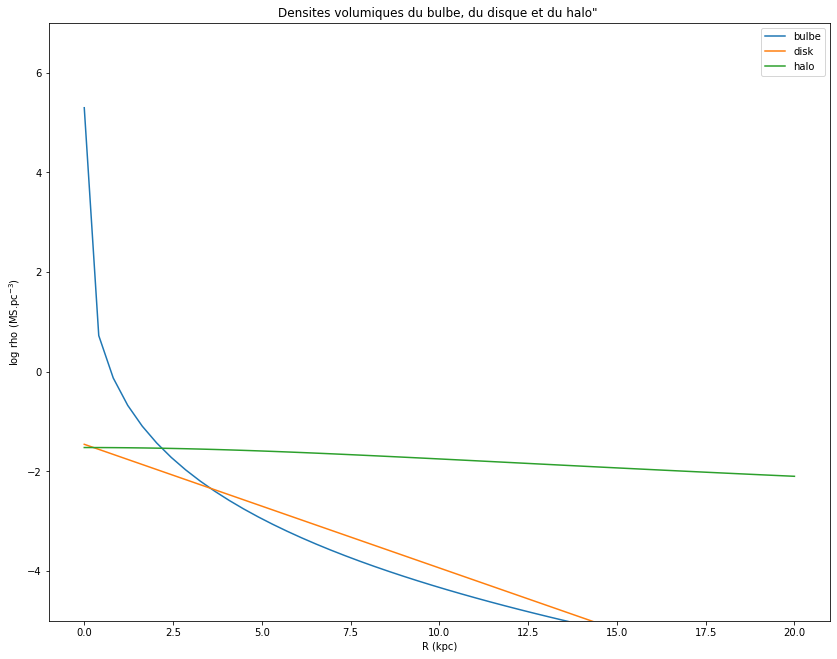

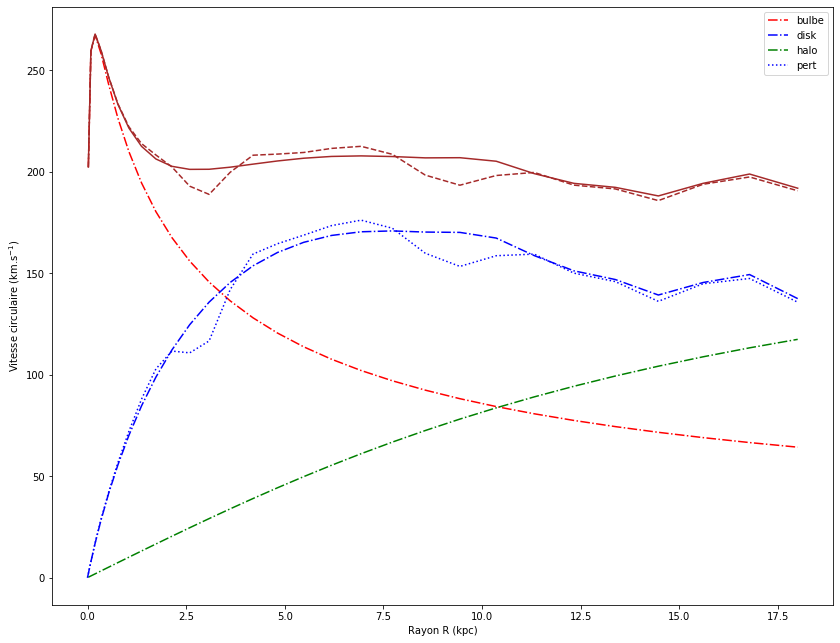

In [1]:
#!/usr/bin/python2.6

import matplotlib.pyplot as plt
from numpy import *
from math import *
import scipy.integrate as si
from scipy import special


%matplotlib inline


G = 6.67e-11



##################### Bulbe #################################


sigma_be = 3.2e3                                     # Densite surfacique massique du centre du bulbe a "half mass scale radius" R_b en masse solaire / pc2 #
k = 7.6695                                           # sans unite #
R_b = 0.5


# Densite surfacique massique du bulbe #

def sigma_b (r):
    return sigma_be*exp(-k*((r/R_b)**(0.25)-1.))
    

# Derivee de la densite surfacique #

def dsigma_b (r):
    return (-k/(4.*R_b**0.25))*(sigma_b(r)/r**0.75)
     

# Densite volumique du bulbe #

def rho_b (r):
    f = lambda x : dsigma_b(x)/sqrt((x**2-r**2))/1.e19    # la conversion du dr en parsec se simplifie avec la conversion du Rb**0.25*r**0.75 #
    return -((1./pi) * (si.quad(f, r, Inf)[0]))*1e16    # revient a mettre les distances en parsec #


# Masse contenue dans un rayon R pour un bulbe spherique #
def masse_b(R):
    f = lambda r: 4.*pi*r*r*rho_b(r)/1000**2#*(3.1e19)**2
    if R == 0:
        return 0
    else:
        return (float(si.quad(f, 0, R)[0]))*1000**5#*3.1e19


# Vitesse rotationnelle a la distance R du centre galactique s'il n'y avait que le bulbe #

def vitesse_b(R):
    return sqrt(G*masse_b(R)*2.e30/(R*3.1e19))



###################### Disque #########################


sigma_dc = 1.75                                 # Densite surfacique massique du centre du disque en masse solaire / pc2 #
R_d = 3.5                                            # kpc #


# Densite surfacique massique du disque #

def sigma_d (r):
    return sigma_dc * exp(-r/R_d)


# Densite volumique du disque #

def rho_d (r):
    return sigma_d(r) / (2*z0*exp((r-R0)/R_d))


# Force sans les perturbations #

def force1(R):
   epsilon=0.1
   f = lambda x, y:  1*sigma(x,y)*(R-x)/((R-x)**2+y**2+epsilon**2)**1.5
   s=si.dblquad(f, -Inf, Inf, lambda x:-Inf, lambda x:Inf, epsabs=1.e-01,
epsrel=1.e-01)[0]
   return s

# Vitesse du disque sans perturbations #

def vitesse_d(R) :
    return sqrt(G*force1(R)*(3e19)*R)



def sigma(x,y):
   return sigma_dc*exp(-(x**2+y**2)**0.5/R_d)

# Perturbations dues a l'anneau #

def ring(x,y):
   f1=0.3
   r1=3.0
   w1=1
   t1=((x**2+y**2)**0.5-r1)/w1
   f2=0.6
   r2=9.5
   w2=2.
   t2=((x**2+y**2)**0.5-r2)/w2
   return sigma(x,y)*(1+f1*exp(-t1**2)*sin(pi/2.*t1)+f2*exp(-t2**2)*sin(pi/2.*t2))

# Force issue de cette nouvelle densite surfacique #

def force2(R):
   epsilon=0.1
   f = lambda x, y: 1*ring(x,y)*(R-x)/((R-x)**2+y**2+epsilon**2)**1.5
   s=si.dblquad(f, -Inf, Inf, lambda x:-Inf, lambda x:Inf, epsabs=1.e-01,
epsrel=1.e-01)[0]
   return s

# Vitesse avec perturbations #

def vitesse_p(R) :
    return sqrt(G*force2(R)*(3e19)*R)




##################### Halo de matiere noire ##############

rho_hc = 0.03                                        # Densite volumique centrale du halo de matiere noire en masses solaires par parsec au carre #
R_h = 12.                                            # Rayon caracteristique du disque de matiere noire #
v_inf = 200e3                                          # Vitesse de rotation a l'infini dans le cas du halo de matiere noire en m/s #
z0 = 247                                             # z0 en kiloparsec #
R0 = 8                                               # Distance du Soleil au centre galactique en kiloparsec #

# Densite volumique du halo de matiere noire #

def rho_h (r):
    return rho_hc * (1+(r/R_h)**2)**-1


# Vitesse rotationnelle a la distance R du centre galactique s'il n'y avait que le halo de matiere noire #

def vitesse_h(R):
    return v_inf * (1-(R_h/R)*arctan(R/R_h))**0.5



##################### Somme des vitesses #################


def vitesse_bd(R):
    return sqrt(vitesse_d(R)**2 + vitesse_b(R)**2)

def vitesse_tot(R):
    return sqrt(vitesse_d(R)**2 + vitesse_b(R)**2 + vitesse_h(R)**2)

def vitesse_totp(R):
    return sqrt(vitesse_b(R)**2 + vitesse_h(R)**2 + vitesse_p(R)**2)




##################### Graphes ################




plt.figure(1, figsize=(14,11))


ax = plt.subplot(111)

#y1_b = zeros(dim)
#y1_d = zeros(dim)
#x1 = linspace(0,20,dim)

#for i in range(dim):
#    y1_b[i]=log10(sigma_b(x1[i]))
#    y1_d[i]=log10(sigma_d(x1[i]))

#p1=plt.plot(x1, y1_b)
#p2=plt.plot(x1, y1_d)
#ax.legend([p1, p2], ["Bulbe", "Disque"])

#plt.ylim(1,5)
#plt.ylabel(r'log SMD (MS.pc$^{-2}$)')
#plt.xlabel("R (kpc)")

#plt.title("""Densites surfaciques du buble et du disque a partir de "United Rotation Curve of the Galaxy" """) 

dim=50
y3_b = zeros(dim)
y3_d = zeros(dim)
y3_h = zeros(dim)
x3 = linspace(0,20,dim)

for i in range(dim):
    y3_b[i]=log10(rho_b(x3[i]))
    y3_d[i]=log10(rho_d(x3[i]))
    y3_h[i]=log10(rho_h(x3[i]))

plt.figure(1)
p1=plt.plot(x3, y3_b, label='bulbe')
p2=plt.plot(x3, y3_d, label='disk')
p3=plt.plot(x3, y3_h, label='halo')
plt.legend()#[p1, p2, p3], ["Bulbe", "Disque", "Halo de matiere noire"])

plt.ylim(-5,7)
plt.ylabel(r'log rho (MS.pc$^{-3}$)')
plt.xlabel("R (kpc)")

plt.title("""Densites volumiques du bulbe, du disque et du halo" """) 


#x2 = linspace(0,20,50)          
x=arange(30.)
x2=x**2/max(x**2)*18.
y2_b = zeros(len(x2))
y2_d = zeros(len(x2))
y2_h = zeros(len(x2))
y2_bd = zeros(len(x2))
y2_tot = zeros(len(x2))
y2_p = zeros(len(x2))
y2_totp = zeros(len(x2))

for i in range(len(x2)):
    y2_b[i] = vitesse_b(x2[i])/1000.
    y2_d[i] = vitesse_d(x2[i])/1000.
    y2_h[i] = vitesse_h(x2[i])/1000.
    #y2_bd[i] = vitesse_bd(x2[i])/1000.
    y2_tot[i] = (y2_b[i]**2+y2_d[i]**2+y2_h[i]**2)**0.5# vitesse_tot(x2[i])/1000.
    y2_p[i] = vitesse_p(x2[i])/1000.
    y2_totp[i] = (y2_tot[i]**2+y2_p[i]**2-y2_d[i]**2)**0.5

plt.figure(2, figsize=(14,11))    
p1=plt.plot(x2, y2_b, 'red', linestyle = '-.', label="bulbe")
p2=plt.plot(x2, y2_d, 'blue', linestyle = '-.', label='disk')
p3=plt.plot(x2, y2_h, 'green', linestyle = '-.', label='halo')
#p4=plt.plot(x2, y2_bd, 'purple', linestyle = ':')
p5=plt.plot(x2, y2_tot, 'brown')
p6=plt.plot(x2, y2_p, 'blue', linestyle = ':', label='pert')
p7=plt.plot(x2, y2_totp, 'brown', linestyle = '--')


#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend([p1,p2,p3,p4,p5,p6,p7], ["Bulbe", "Disque", "Halo de matiere noire", "Bulbe + Disque", "Somme des trois composantes", "Disque avec perturbations", "Somme des trois composantes avec perturbations"])
plt.legend()#[p1,p2,p3,p5,p6,p7], ["Bulbe", "Disque", "Halo de matiere noire", "Somme des trois composantes", "Disque avec perturbations", "Somme des trois composantes avec perturbations"])
###ax.legend([p1,p2,p3,p5], ["Bulbe", "Disque", "Halo de matiere noire", "Somme des trois composantes"])


#plt.title("""Courbes de rotation sous l'influence du bulbe, du disque et du halo de matiere noire""")
plt.xlabel("Rayon R (kpc)")
plt.ylabel(r'Vitesse circulaire (km.s$^{-1}$)')




plt.show()